<a href="https://colab.research.google.com/github/maxoti/BBIT-05-0068-2021/blob/main/imagemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
data_train_path = '/content/drive/MyDrive/data/train'
data_test_path = '/content/drive/MyDrive/data/test'
data_val_path = '/content/drive/MyDrive/data/validation'

In [5]:
img_width = 180
img_height =180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 252 files belonging to 5 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['Dermatophilosis', 'Lumphy Skin', 'Mange', 'Photosensitization', 'Ringworm']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 252 files belonging to 5 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 252 files belonging to 5 classes.


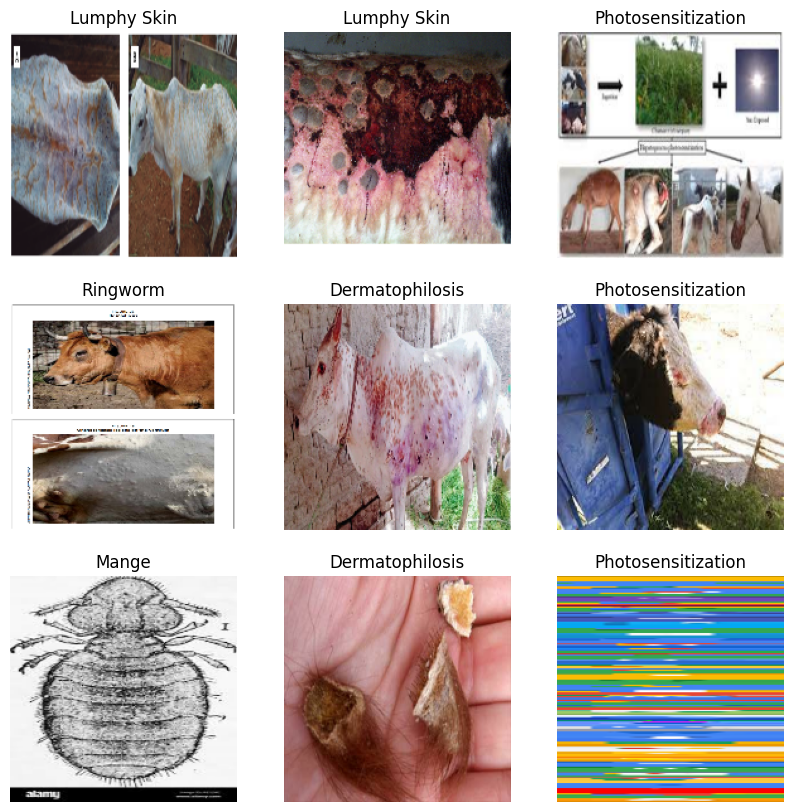

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
8/8 [==============================] - 46s 6s/step - loss: 3.5217 - accuracy: 0.1905 - val_loss: 1.6022 - val_accuracy: 0.2579
Epoch 2/25
8/8 [==============================] - 17s 2s/step - loss: 1.6046 - accuracy: 0.1865 - val_loss: 1.5721 - val_accuracy: 0.3135
Epoch 3/25
8/8 [==============================] - 22s 2s/step - loss: 1.5651 - accuracy: 0.3095 - val_loss: 1.5128 - val_accuracy: 0.3294
Epoch 4/25
8/8 [==============================] - 17s 2s/step - loss: 1.5014 - accuracy: 0.3810 - val_loss: 1.4193 - val_accuracy: 0.5238
Epoch 5/25
8/8 [==============================] - 17s 2s/step - loss: 1.4247 - accuracy: 0.4246 - val_loss: 1.3472 - val_accuracy: 0.4802
Epoch 6/25
8/8 [==============================] - 17s 2s/step - loss: 1.3180 - accuracy: 0.4365 - val_loss: 1.1771 - val_accuracy: 0.6032
Epoch 7/25
8/8 [==============================] - 23s 3s/step - loss: 1.1761 - accuracy: 0.5635 - val_loss: 1.1254 - val_accuracy: 0.5635
Epoch 8/25
8/8 [==================

Text(0.5, 1.0, 'Loss')

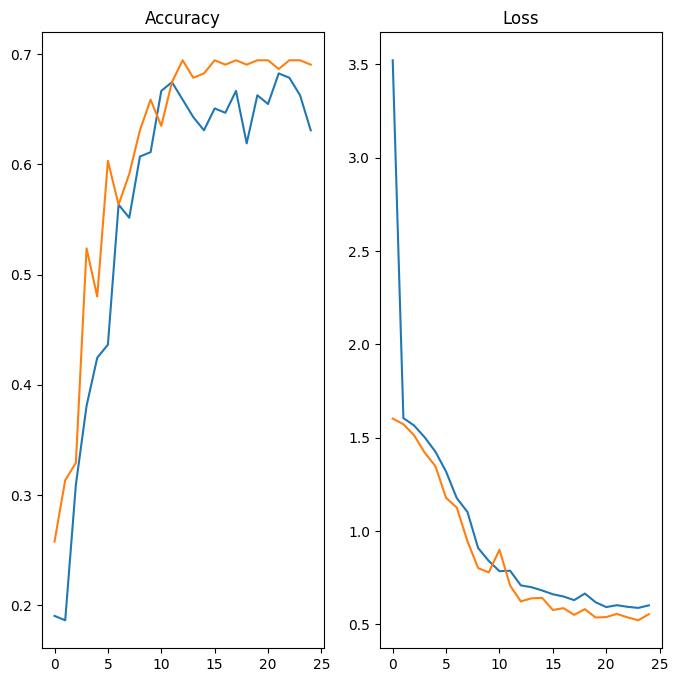

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = '/content/drive/MyDrive/data/validation/Lumphy Skin/Lumpy-skin-disease-in-cattle-overseas.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 149ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('Animal in image is suffering from {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Animal in image is suffering from Lumphy Skin with accuracy of 54.55


In [23]:
model.save('Image_classifer_successful.keras')